In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_column',None)
from random import sample
from sklearn import preprocessing
from sklearn.preprocessing import scale
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Asteroid.csv')

C:\Users\saina\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,14,15,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

full_name         a         e     G          i          om  \
0                 1 Ceres  2.769165  0.076009  0.12  10.594067   80.305532   
1                2 Pallas  2.772466  0.230337  0.11  34.836234  173.080063   
2                  3 Juno  2.669150  0.256942  0.32  12.988919  169.852760   
3                 4 Vesta  2.361418  0.088721  0.32   7.141771  103.810804   
4               5 Astraea  2.574249  0.191095   NaN   5.366988  141.576604   
...                   ...       ...       ...   ...        ...         ...   
839731         (6344 P-L)  2.812945  0.664688   NaN   4.695700  183.310012   
839732         (1168 T-2)  2.645238  0.259376   NaN  12.574937    1.620020   
839733         (2060 T-2)  2.373137  0.202053   NaN   0.732484  176.499082   
839734         (2678 T-3)  2.260404  0.258348   NaN   9.661947  204.512448   
839735         (4571 T-3)  2.546442  0.287672   NaN   5.356238   70.709555   

                 w         q        ad     per_y  data_arc condition_code  \
0        73.597694  2.558684  2.979647  4.608202    8822.0              0   
1       310.048857  2.133865  3.411067  4.616444   72318.0              0   
2       248.138626  1.983332  3.354967  4.360814   72684.0              0   
3       150.728541  2.151909  2.570926  3.628837   24288.0              0   
4       358.687608  2.082324  3.066174  4.130323   63431.0              0   
...            ...       ...       ...       ...       ...            ...   
839731  234.618352  0.943214  4.682676  4.717914   17298.0              0   
839732  339.568072  1.959126  3.331350  4.302346      16.0              9   
839733  198.026527  1.893638  2.852636  3.655884       5.0              9   
839734  148.496988  1.676433  2.844376  3.398501      10.0              9   
839735  273.483265  1.813901  3.278983  4.063580      11.0              9   

        n_obs_used       H diameter                 extent  albedo    rot_per  \
0             1002   3.340    939.4  964.4 x 964.2 x 891.8  0.0900   9.074170   
1             8490   4.130      545            582x556x500  0.1010   7.813200   
2             7104   5.330  246.596                    NaN  0.2140   7.210000   
3             9325   3.200    525.4  572.6 x 557.2 x 446.4  0.4228   5.342128   
4             2861   6.850  106.699                    NaN  0.2740  16.806000   
...            ...     ...      ...                    ...     ...        ...   
839731         118  20.400      NaN                    NaN     NaN        NaN   
839732          15  17.507      NaN                    NaN     NaN        NaN   
839733           6  18.071      NaN                    NaN     NaN        NaN   
839734          13  18.060      NaN                    NaN     NaN        NaN   
839735          11  17.406      NaN                    NaN     NaN        NaN   

             GM     BV     UB  IR spec_B spec_T neo pha      moid  
0       62.6284  0.713  0.426 NaN      C      G   N   N  1.594780  
1       14.3000  0.635  0.284 NaN      B      B   N   N  1.233240  
2           NaN  0.824  0.433 NaN     Sk      S   N   N  1.034540  
3       17.8000  0.782  0.492 NaN      V      V   N   N  1.139480  
4           NaN  0.826  0.411 NaN      S      S   N   N  1.095890  
...         ...    ...    ...  ..    ...    ...  ..  ..       ...  
839731      NaN    NaN    NaN NaN    NaN    NaN   Y   Y  0.032397  
839732      NaN    NaN    NaN NaN    NaN    NaN   N   N  0.956145  
839733      NaN    NaN    NaN NaN    NaN    NaN   N   N  0.893896  
839734      NaN    NaN    NaN NaN    NaN    NaN   N   N  0.680220  
839735      NaN    NaN    NaN NaN    NaN    NaN   N   N  0.815280  

[839736 rows x 27 columns]

In [4]:
df.describe()

a              e           G              i             om  \
count  839734.000000  839736.000000  119.000000  839736.000000  839736.000000   
mean        2.843217       0.155633    0.178739       8.950009     168.501641   
std        37.327031       0.093888    0.134603       6.666273     103.096571   
min    -32588.942986       0.000000   -0.250000       0.007546       0.000388   
25%         2.385244       0.091453    0.100000       4.069043      80.212344   
50%         2.644219       0.143654    0.190000       7.257311     160.296065   
75%         2.996035       0.199400    0.250000      12.256026     252.206645   
max      3043.149073       1.201134    0.600000     175.188725     359.999800   

                   w              q             ad          per_y  \
count  839736.000000  839736.000000  839730.000000  839735.000000   
mean      181.076593       2.404732       3.385707       6.859544   
std       104.024110       2.233138      12.746419     252.172503   
min         0.001666       0.070511       0.773684       0.000000   
25%        91.039551       1.971939       2.775342       3.683896   
50%       181.669812       2.225494       3.037745       4.299860   
75%       271.523344       2.578162       3.357958       5.185951   
max       359.999833      80.424175    6081.841956  167877.712688   

            data_arc     n_obs_used              H         albedo  \
count  823947.000000  839736.000000  837042.000000  136452.000000   
mean     5660.187025     254.617708      16.786069       0.130052   
std      4192.420393     363.004548       1.821274       0.109983   
min         0.000000       2.000000      -1.100000       0.001000   
25%      3599.000000      50.000000      15.900000       0.053000   
50%      5792.000000     118.000000      16.800000       0.078000   
75%      7228.000000     292.000000      17.600000       0.188000   
max     72684.000000    9325.000000      33.200000       1.000000   

            rot_per            GM           BV          UB    IR          moid  
count  18796.000000  1.400000e+01  1021.000000  979.000000  1.00  8.228140e+05  
mean      21.136772  7.821928e+00     0.769212    0.364396 -0.33  1.423511e+00  
std       73.131751  1.678880e+01     0.088625    0.095780   NaN  2.251048e+00  
min        0.004389  2.100000e-09     0.580000    0.120000 -0.33  3.437640e-07  
25%        4.210000  1.022225e-03     0.700000    0.289000 -0.33  9.785395e-01  
50%        6.653000  6.192500e-01     0.743000    0.360000 -0.33  1.237880e+00  
75%       12.624250  6.500000e+00     0.850000    0.439000 -0.33  1.590610e+00  
max     3240.000000  6.262840e+01     1.077000    0.655000 -0.33  7.950130e+01

In [5]:
df.isna().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

In [7]:
df1=df.dropna(subset=['diameter'])

In [8]:
df1

full_name         a         e     G          i          om  \
0                  1 Ceres  2.769165  0.076009  0.12  10.594067   80.305532   
1                 2 Pallas  2.772466  0.230337  0.11  34.836234  173.080063   
2                   3 Juno  2.669150  0.256942  0.32  12.988919  169.852760   
3                  4 Vesta  2.361418  0.088721  0.32   7.141771  103.810804   
4                5 Astraea  2.574249  0.191095   NaN   5.366988  141.576604   
...                    ...       ...       ...   ...        ...         ...   
797896          (2016 NB7)  3.171225  0.159119   NaN  27.098625  309.036573   
798113         (2016 NW24)  2.548410  0.076071   NaN  11.593237  246.298656   
798225         (2016 NR35)  3.146246  0.220559   NaN  17.966646  137.981403   
799788         (2016 PB66)  3.051336  0.287449   NaN  14.456779  343.917822   
810411         (2017 BV98)  2.417477  0.109001   NaN   4.525668  148.244819   

                 w         q        ad     per_y  data_arc condition_code  \
0        73.597694  2.558684  2.979647  4.608202    8822.0              0   
1       310.048857  2.133865  3.411067  4.616444   72318.0              0   
2       248.138626  1.983332  3.354967  4.360814   72684.0              0   
3       150.728541  2.151909  2.570926  3.628837   24288.0              0   
4       358.687608  2.082324  3.066174  4.130323   63431.0              0   
...            ...       ...       ...       ...       ...            ...   
797896   19.746812  2.666623  3.675826  5.647402    2373.0              1   
798113  170.090810  2.354549  2.742270  4.068291    3297.0              2   
798225  180.898833  2.452313  3.840180  5.580811    2839.0              1   
799788  342.614839  2.174231  3.928440  5.330196    2208.0              2   
810411   31.949854  2.153970  2.680984  3.758822    3458.0              3   

        n_obs_used      H diameter                 extent  albedo    rot_per  \
0             1002   3.34    939.4  964.4 x 964.2 x 891.8  0.0900   9.074170   
1             8490   4.13      545            582x556x500  0.1010   7.813200   
2             7104   5.33  246.596                    NaN  0.2140   7.210000   
3             9325   3.20    525.4  572.6 x 557.2 x 446.4  0.4228   5.342128   
4             2861   6.85  106.699                    NaN  0.2740  16.806000   
...            ...    ...      ...                    ...     ...        ...   
797896          50  16.20    3.793                    NaN  0.0210        NaN   
798113          33  17.30    2.696                    NaN  0.0610        NaN   
798225          47  16.80    2.917                    NaN     NaN        NaN   
799788          27  17.20    3.271                    NaN  0.0720        NaN   
810411          25  18.40      1.6                    NaN  0.0230        NaN   

             GM     BV     UB  IR spec_B spec_T neo pha     moid  
0       62.6284  0.713  0.426 NaN      C      G   N   N  1.59478  
1       14.3000  0.635  0.284 NaN      B      B   N   N  1.23324  
2           NaN  0.824  0.433 NaN     Sk      S   N   N  1.03454  
3       17.8000  0.782  0.492 NaN      V      V   N   N  1.13948  
4           NaN  0.826  0.411 NaN      S      S   N   N  1.09589  
...         ...    ...    ...  ..    ...    ...  ..  ..      ...  
797896      NaN    NaN    NaN NaN    NaN    NaN   N   N  1.66301  
798113      NaN    NaN    NaN NaN    NaN    NaN   N   N  1.36733  
798225      NaN    NaN    NaN NaN    NaN    NaN   N   N  1.43837  
799788      NaN    NaN    NaN NaN    NaN    NaN   N   N  1.16684  
810411      NaN    NaN    NaN NaN    NaN    NaN   N   N  1.15942  

[137681 rows x 27 columns]

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137681 entries, 0 to 810411
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       137681 non-null  object 
 1   a               137681 non-null  float64
 2   e               137681 non-null  float64
 3   G               119 non-null     float64
 4   i               137681 non-null  float64
 5   om              137681 non-null  float64
 6   w               137681 non-null  float64
 7   q               137681 non-null  float64
 8   ad              137681 non-null  float64
 9   per_y           137681 non-null  float64
 10  data_arc        137541 non-null  float64
 11  condition_code  137681 non-null  object 
 12  n_obs_used      137681 non-null  int64  
 13  H               136930 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          16 non-null      object 
 16  albedo          136449 non-null  float64
 17  rot_per   

In [10]:
df1 = df1.drop(columns=['full_name', 'H', 'albedo', 'G', 'extent', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T'])


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137681 entries, 0 to 810411
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137681 non-null  float64
 1   e               137681 non-null  float64
 2   i               137681 non-null  float64
 3   om              137681 non-null  float64
 4   w               137681 non-null  float64
 5   q               137681 non-null  float64
 6   ad              137681 non-null  float64
 7   per_y           137681 non-null  float64
 8   data_arc        137541 non-null  float64
 9   condition_code  137681 non-null  object 
 10  n_obs_used      137681 non-null  int64  
 11  diameter        137681 non-null  object 
 12  neo             137681 non-null  object 
 13  pha             137681 non-null  object 
 14  moid            137681 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 16.8+ MB


In [12]:
df1.diameter = pd.to_numeric(df1.diameter, errors='coerce')

In [13]:
np.sum(df1.diameter.isna())


1

In [14]:
df1 = df1.dropna(subset=['diameter'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137680 entries, 0 to 810411
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137680 non-null  float64
 1   e               137680 non-null  float64
 2   i               137680 non-null  float64
 3   om              137680 non-null  float64
 4   w               137680 non-null  float64
 5   q               137680 non-null  float64
 6   ad              137680 non-null  float64
 7   per_y           137680 non-null  float64
 8   data_arc        137540 non-null  float64
 9   condition_code  137680 non-null  object 
 10  n_obs_used      137680 non-null  int64  
 11  diameter        137680 non-null  float64
 12  neo             137680 non-null  object 
 13  pha             137680 non-null  object 
 14  moid            137680 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 16.8+ MB


In [15]:
df1.diameter.describe()

count    137680.000000
mean          5.480873
std           9.365499
min           0.002500
25%           2.770000
50%           3.956000
75%           5.741000
max         939.400000
Name: diameter, dtype: float64

In [16]:
df1.isna().sum()

a                   0
e                   0
i                   0
om                  0
w                   0
q                   0
ad                  0
per_y               0
data_arc          140
condition_code      0
n_obs_used          0
diameter            0
neo                 0
pha                 0
moid                0
dtype: int64

In [17]:
df1 = df1.dropna(subset=['data_arc'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137540 entries, 0 to 810411
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137540 non-null  float64
 1   e               137540 non-null  float64
 2   i               137540 non-null  float64
 3   om              137540 non-null  float64
 4   w               137540 non-null  float64
 5   q               137540 non-null  float64
 6   ad              137540 non-null  float64
 7   per_y           137540 non-null  float64
 8   data_arc        137540 non-null  float64
 9   condition_code  137540 non-null  object 
 10  n_obs_used      137540 non-null  int64  
 11  diameter        137540 non-null  float64
 12  neo             137540 non-null  object 
 13  pha             137540 non-null  object 
 14  moid            137540 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 16.8+ MB


In [18]:
df1.condition_code.value_counts()

0      126192
9        5584
0        2017
9.0       827
1         809
1         563
2         302
5         242
6         152
4         144
3         135
7         129
2          95
5.0        92
7.0        78
8          49
6.0        36
4.0        33
3          33
8.0        28
Name: condition_code, dtype: int64

In [19]:
df1.condition_code = pd.to_numeric(df1.condition_code, errors='coerce')


In [20]:
df1.data_arc.describe()

count    137540.000000
mean       8908.697681
std        6150.505469
min           1.000000
25%        6265.000000
50%        7492.000000
75%        9655.000000
max       72684.000000
Name: data_arc, dtype: float64

In [21]:
df1.data_arc.value_counts()

1.0        4257
2.0        1808
7150.0      144
5.0         128
4.0         110
           ... 
43338.0       1
12811.0       1
18505.0       1
1218.0        1
11783.0       1
Name: data_arc, Length: 19608, dtype: int64

In [22]:
df1.data_arc.isna().sum()

0

In [23]:
df1.data_arc.mean()

8908.697680674713

In [24]:
df1.data_arc.median()

7492.0

(array([6.4670e+04, 5.7294e+04, 8.5740e+03, 4.5060e+03, 1.3350e+03,
        7.7700e+02, 2.3600e+02, 1.1500e+02, 3.1000e+01, 2.0000e+00]),
 array([1.00000e+00, 7.26930e+03, 1.45376e+04, 2.18059e+04, 2.90742e+04,
        3.63425e+04, 4.36108e+04, 5.08791e+04, 5.81474e+04, 6.54157e+04,
        7.26840e+04]),
 <BarContainer object of 10 artists>)

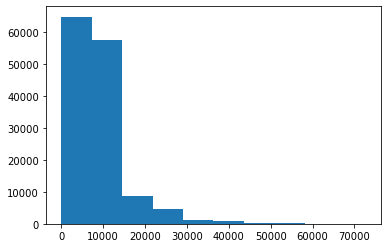

In [25]:
plt.hist(df1.data_arc)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data_arc', ylabel='Density'>

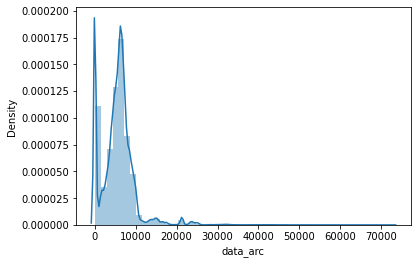

In [26]:
sns.distplot(df.data_arc)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data_arc'>

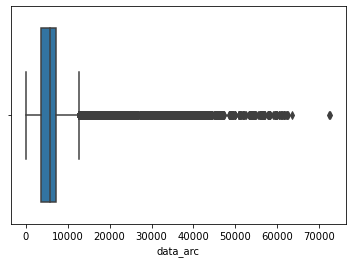

In [27]:
sns.boxplot(df.data_arc)

In [28]:
IQR=df1.data_arc.quantile(0.75)-df1.data_arc.quantile(0.25)
IQR

3390.0

In [29]:
upper_limit=df1.data_arc.quantile(0.75)+(1.5*IQR)
upper_limit

14740.0

In [30]:
len(df1.data_arc[df1.data_arc>14740.0])

15105

In [31]:
df1=df1[df1['data_arc']<=20000]

(array([ 7561.,  4121., 17663., 51277., 26929.,  9236.,  3837.,  5115.,
         2311.,   482.]),
 array([1.00000e+00, 2.00090e+03, 4.00080e+03, 6.00070e+03, 8.00060e+03,
        1.00005e+04, 1.20004e+04, 1.40003e+04, 1.60002e+04, 1.80001e+04,
        2.00000e+04]),
 <BarContainer object of 10 artists>)

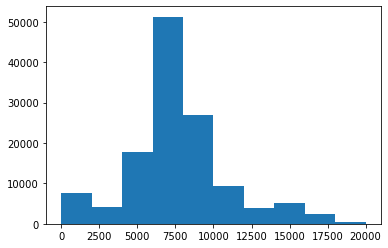

In [32]:
plt.hist(df1.data_arc)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data_arc', ylabel='Density'>

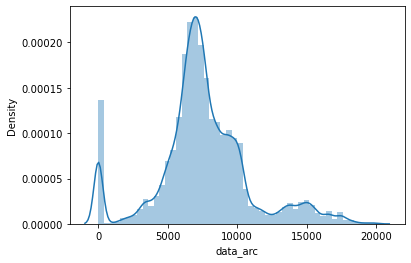

In [33]:
sns.distplot(df1.data_arc)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='data_arc', ylabel='diameter'>

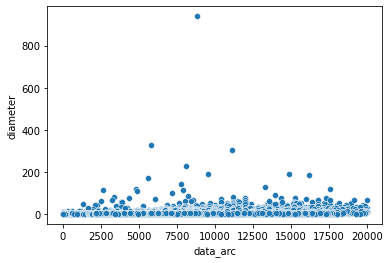

In [34]:
sns.scatterplot(df1.data_arc,df1.diameter)

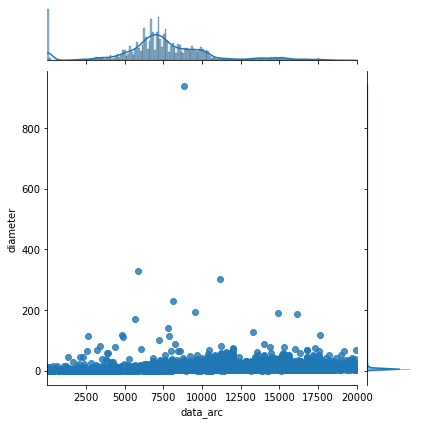

In [35]:
sns.jointplot(x='data_arc',y='diameter',data=df1,kind='reg')

In [36]:
np.corrcoef(df1.a,df1.diameter)

array([[1.       , 0.2280146],
       [0.2280146, 1.       ]])

In [37]:
df1.a.describe()

count    128532.000000
mean          2.818510
std           1.564922
min           0.626226
25%           2.544847
50%           2.756138
75%           3.094434
max         389.145964
Name: a, dtype: float64

In [38]:
df1.a.isna().sum()

0

In [39]:
df1.a.value_counts()

2.295684    1
1.870360    1
2.682152    1
3.189606    1
2.608145    1
           ..
3.086662    1
3.120680    1
2.527471    1
2.416603    1
3.007142    1
Name: a, Length: 128532, dtype: int64

(array([1.28524e+05, 5.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.62622554,  39.4781994 ,  78.33017327, 117.18214714,
        156.034121  , 194.88609487, 233.73806873, 272.5900426 ,
        311.44201647, 350.29399033, 389.1459642 ]),
 <BarContainer object of 10 artists>)

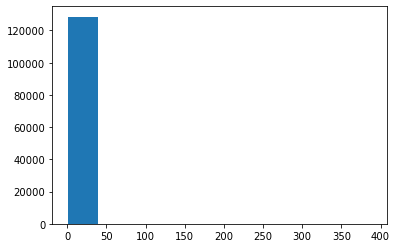

In [40]:
plt.hist(df1.a)

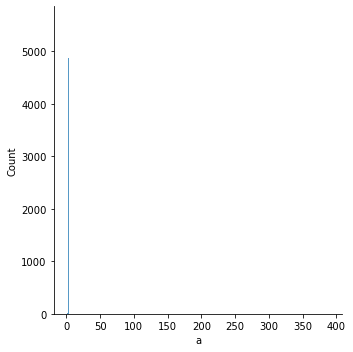

In [41]:
sns.displot(df1.a)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='a'>

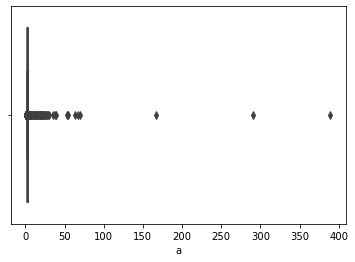

In [42]:
sns.boxplot(df1.a)

In [43]:
IQR=df1.a.quantile(0.75)-df1.a.quantile(0.25)
IQR

0.5495870855301317

In [44]:
upper_limit=df1.a.quantile(0.75)+(1.5*IQR)
upper_limit

3.9188144152984554

In [45]:
len(df1.a[df1.a>3.9188020432115467])

2679

In [46]:
df1=df1[df1['a']<=20]

(array([3.1290e+04, 9.5528e+04, 1.6570e+03, 8.0000e+00, 1.0000e+00,
        9.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([ 0.62622554,  2.53765446,  4.44908339,  6.36051231,  8.27194124,
        10.18337016, 12.09479909, 14.00622801, 15.91765694, 17.82908586,
        19.74051479]),
 <BarContainer object of 10 artists>)

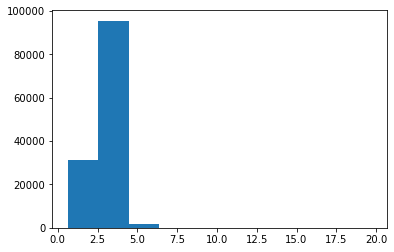

In [47]:
plt.hist(df1.a)

In [48]:
np.corrcoef(df1.a,df1.diameter)

array([[1.        , 0.47932796],
       [0.47932796, 1.        ]])

In [49]:
df1.e.describe()

count    128507.000000
mean          0.145398
std           0.077410
min           0.000489
25%           0.089335
50%           0.138388
75%           0.191272
max           0.968381
Name: e, dtype: float64

In [50]:
df1.e.value_counts()

0.131235    1
0.147064    1
0.130770    1
0.444489    1
0.177284    1
           ..
0.139616    1
0.149206    1
0.121275    1
0.030162    1
0.094294    1
Name: e, Length: 128507, dtype: int64

In [51]:
df1.e.isna().sum()

0

In [52]:
plt.hist(df1.e)

(array([3.7036e+04, 6.0844e+04, 2.6357e+04, 3.4440e+03, 3.7200e+02,
        1.9400e+02, 1.4500e+02, 6.7000e+01, 3.2000e+01, 1.6000e+01]),
 array([4.88536321e-04, 9.72777890e-02, 1.94067042e-01, 2.90856294e-01,
        3.87645547e-01, 4.84434800e-01, 5.81224052e-01, 6.78013305e-01,
        7.74802558e-01, 8.71591810e-01, 9.68381063e-01]),
 <BarContainer object of 10 artists>)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='e', ylabel='Density'>

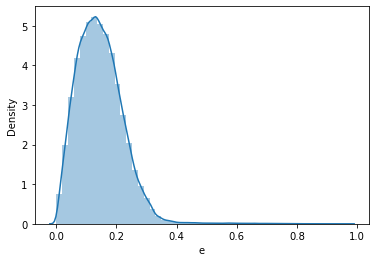

In [53]:
sns.distplot(df1.e)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='e'>

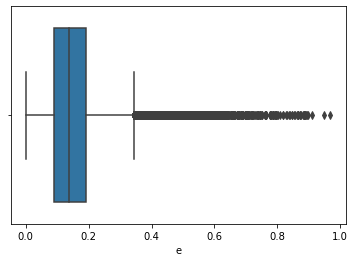

In [54]:
sns.boxplot(df1.e)

In [55]:
np.corrcoef(df1.e,df1.diameter)

array([[ 1.        , -0.10283305],
       [-0.10283305,  1.        ]])

In [56]:
IQR=df1.e.quantile(0.75)-df1.e.quantile(0.25)
IQR

0.10193693803389524

In [57]:
upper_limit=df1.e.quantile(0.75)+(1.5*IQR)
upper_limit

0.34417774082163344

In [58]:
len(df1.e[df1.e>0.34417681995025173])

1367

In [59]:
df1=df1[df1['e']<=0.5]

(array([11166., 27819., 33050., 28811., 17201.,  6999.,  2213.,   494.,
          193.,   140.]),
 array([4.88536321e-04, 5.04028290e-02, 1.00317122e-01, 1.50231414e-01,
        2.00145707e-01, 2.50060000e-01, 2.99974293e-01, 3.49888585e-01,
        3.99802878e-01, 4.49717171e-01, 4.99631463e-01]),
 <BarContainer object of 10 artists>)

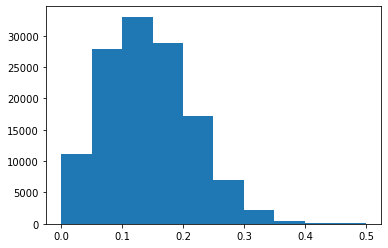

In [60]:
plt.hist(df1.e)

In [61]:
np.corrcoef(df1.e,df1.diameter)

array([[ 1.        , -0.09678153],
       [-0.09678153,  1.        ]])

<AxesSubplot:xlabel='e', ylabel='diameter'>

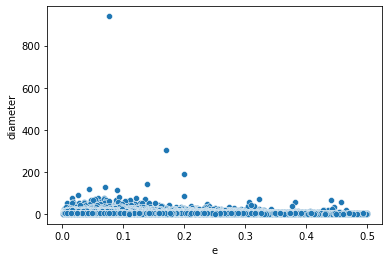

In [62]:
sns.scatterplot(x='e',y='diameter',data=df1)

In [63]:
df1.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
diameter          0
neo               0
pha               0
moid              0
dtype: int64

In [64]:
df1.i.describe()

count    128086.000000
mean         10.431923
std           6.701391
min           0.021855
25%           5.228476
50%           9.518632
75%          13.828515
max         151.813136
Name: i, dtype: float64

(array([1.0320e+05, 2.4273e+04, 5.8200e+02, 2.3000e+01, 6.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.18548963e-02, 1.52009830e+01, 3.03801111e+01, 4.55592392e+01,
        6.07383673e+01, 7.59174954e+01, 9.10966236e+01, 1.06275752e+02,
        1.21454880e+02, 1.36634008e+02, 1.51813136e+02]),
 <BarContainer object of 10 artists>)

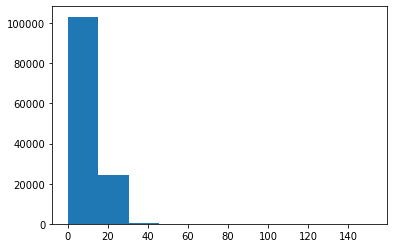

In [65]:
plt.hist(df1.i)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='i', ylabel='Density'>

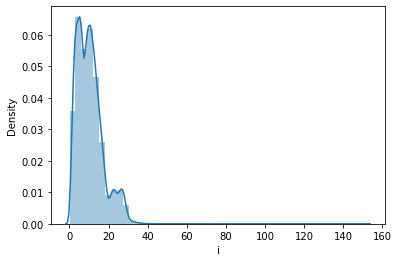

In [66]:
sns.distplot(df1.i)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='i'>

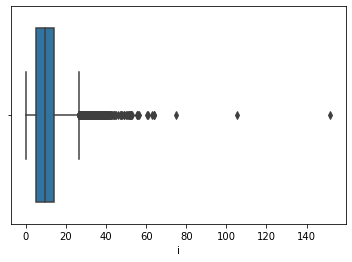

In [67]:
sns.boxplot(df1.i)

In [68]:
IQR=df1.i.quantile(0.75)-df1.i.quantile(0.25)
IQR

8.600038417052748

In [69]:
upper_limit=df1.i.quantile(0.75)+(1.5*IQR)
upper_limit

26.728572405106235

In [70]:
len(df1.i[df1.i>26.728555696781683])

3902

In [71]:
df1=df1[df1['i']<=40]

(array([21641., 30668., 31080., 22906.,  9226.,  4923.,  5283.,  1945.,
          283.,    77.]),
 array([2.18548963e-02, 3.99287359e+00, 7.96389228e+00, 1.19349110e+01,
        1.59059297e+01, 1.98769484e+01, 2.38479671e+01, 2.78189857e+01,
        3.17900044e+01, 3.57610231e+01, 3.97320418e+01]),
 <BarContainer object of 10 artists>)

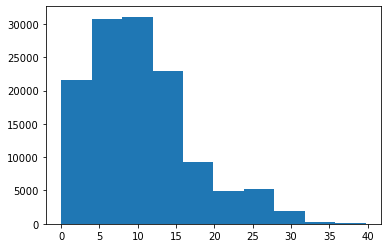

In [72]:
plt.hist(df1.i)

In [73]:
np.corrcoef(df1.i,df1.diameter)

array([[1.        , 0.10136889],
       [0.10136889, 1.        ]])

In [74]:
df1.head()

a         e          i          om           w         q  \
0     2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
616   5.215835  0.138432  22.048300   44.351815  307.949164  4.493797   
1142  5.248071  0.089745   3.137171  221.269470  236.416605  4.777081   
1833  3.025208  0.070233   9.437540  268.154776  358.646011  2.812737   
1855  2.236657  0.079589   4.741198  185.860452   55.573468  2.058643   

            ad      per_y  data_arc  condition_code  n_obs_used  diameter neo  \
0     2.979647   4.608202    8822.0             0.0        1002   939.400   N   
616   5.937873  11.912254    7787.0             0.0        3955   140.362   N   
1142  5.719062  12.022860    7896.0             0.0        2171   114.624   N   
1833  3.237679   5.261881   18160.0             0.0        2021    17.156   N   
1855  2.414671   3.345087   18207.0             0.0        2218     6.620   N   

     pha     moid  
0      N  1.59478  
616    N  3.54050  
1142   N  3.79531  
1833   N  1.79635  
1855   N  1.05062

In [75]:
df1.om.describe()

count    128032.000000
mean        169.516767
std         102.484043
min           0.001246
25%          82.300614
50%         159.562009
75%         255.800448
max         359.990858
Name: om, dtype: float64

In [76]:
df1.om.isna().sum()

0

(array([12969., 14618., 15263., 14994., 13798., 12304., 10996., 10410.,
        10953., 11727.]),
 array([1.24608243e-03, 3.60002073e+01, 7.19991685e+01, 1.07998130e+02,
        1.43997091e+02, 1.79996052e+02, 2.15995013e+02, 2.51993975e+02,
        2.87992936e+02, 3.23991897e+02, 3.59990858e+02]),
 <BarContainer object of 10 artists>)

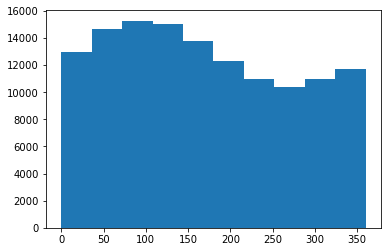

In [77]:
plt.hist(df1.om)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='om', ylabel='Density'>

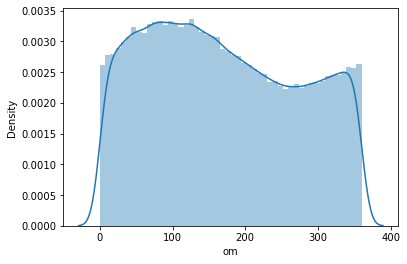

In [78]:
sns.distplot(df1.om)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='om'>

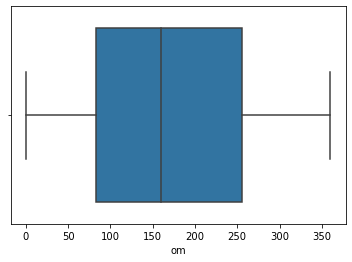

In [79]:
sns.boxplot(df1.om)

In [80]:
np.corrcoef(df1.om,df1.diameter)

array([[ 1.00000000e+00, -1.72828563e-04],
       [-1.72828563e-04,  1.00000000e+00]])

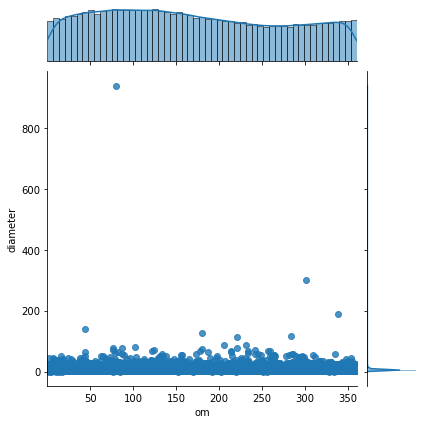

In [81]:
sns.jointplot(x='om',y='diameter',data=df1,kind='reg')

In [82]:
df1.head()

a         e          i          om           w         q  \
0     2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
616   5.215835  0.138432  22.048300   44.351815  307.949164  4.493797   
1142  5.248071  0.089745   3.137171  221.269470  236.416605  4.777081   
1833  3.025208  0.070233   9.437540  268.154776  358.646011  2.812737   
1855  2.236657  0.079589   4.741198  185.860452   55.573468  2.058643   

            ad      per_y  data_arc  condition_code  n_obs_used  diameter neo  \
0     2.979647   4.608202    8822.0             0.0        1002   939.400   N   
616   5.937873  11.912254    7787.0             0.0        3955   140.362   N   
1142  5.719062  12.022860    7896.0             0.0        2171   114.624   N   
1833  3.237679   5.261881   18160.0             0.0        2021    17.156   N   
1855  2.414671   3.345087   18207.0             0.0        2218     6.620   N   

     pha     moid  
0      N  1.59478  
616    N  3.54050  
1142   N  3.79531  
1833   N  1.79635  
1855   N  1.05062

In [83]:
df1.w.describe()

count    128032.000000
mean        182.153660
std         103.476156
min           0.004466
25%          92.299584
50%         184.265484
75%         271.875000
max         359.995174
Name: w, dtype: float64

(array([12203., 12416., 13011., 12646., 12262., 12676., 13211., 13773.,
        13184., 12650.]),
 array([4.46626728e-03, 3.60035370e+01, 7.20026078e+01, 1.08001679e+02,
        1.44000749e+02, 1.79999820e+02, 2.15998891e+02, 2.51997962e+02,
        2.87997032e+02, 3.23996103e+02, 3.59995174e+02]),
 <BarContainer object of 10 artists>)

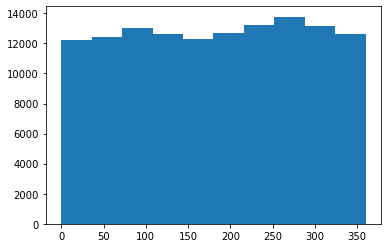

In [84]:
plt.hist(df1.w)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='w'>

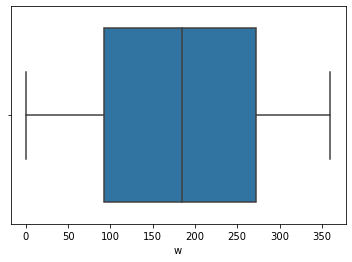

In [85]:
sns.boxplot(df1.w)

In [86]:
df1.head()

a         e          i          om           w         q  \
0     2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
616   5.215835  0.138432  22.048300   44.351815  307.949164  4.493797   
1142  5.248071  0.089745   3.137171  221.269470  236.416605  4.777081   
1833  3.025208  0.070233   9.437540  268.154776  358.646011  2.812737   
1855  2.236657  0.079589   4.741198  185.860452   55.573468  2.058643   

            ad      per_y  data_arc  condition_code  n_obs_used  diameter neo  \
0     2.979647   4.608202    8822.0             0.0        1002   939.400   N   
616   5.937873  11.912254    7787.0             0.0        3955   140.362   N   
1142  5.719062  12.022860    7896.0             0.0        2171   114.624   N   
1833  3.237679   5.261881   18160.0             0.0        2021    17.156   N   
1855  2.414671   3.345087   18207.0             0.0        2218     6.620   N   

     pha     moid  
0      N  1.59478  
616    N  3.54050  
1142   N  3.79531  
1833   N  1.79635  
1855   N  1.05062

In [87]:
df1.q.describe()

count    128032.000000
mean          2.408605
std           0.468974
min           0.357121
25%           2.077883
50%           2.374071
75%           2.688891
max          13.159583
Name: q, dtype: float64

(array([5.91000e+02, 1.16917e+05, 8.87800e+03, 1.63200e+03, 4.00000e+00,
        2.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([ 0.35712128,  1.6373675 ,  2.91761372,  4.19785994,  5.47810616,
         6.75835238,  8.0385986 ,  9.31884482, 10.59909104, 11.87933726,
        13.15958348]),
 <BarContainer object of 10 artists>)

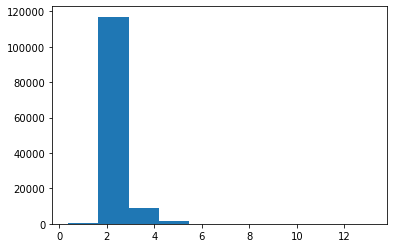

In [88]:
plt.hist(df1.q)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='q'>

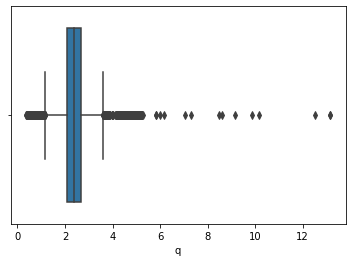

In [89]:
sns.boxplot(df1.q)

In [90]:
np.corrcoef(df1.q,df1.diameter)

array([[1.        , 0.45279486],
       [0.45279486, 1.        ]])

In [91]:
df1.head()

a         e          i          om           w         q  \
0     2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
616   5.215835  0.138432  22.048300   44.351815  307.949164  4.493797   
1142  5.248071  0.089745   3.137171  221.269470  236.416605  4.777081   
1833  3.025208  0.070233   9.437540  268.154776  358.646011  2.812737   
1855  2.236657  0.079589   4.741198  185.860452   55.573468  2.058643   

            ad      per_y  data_arc  condition_code  n_obs_used  diameter neo  \
0     2.979647   4.608202    8822.0             0.0        1002   939.400   N   
616   5.937873  11.912254    7787.0             0.0        3955   140.362   N   
1142  5.719062  12.022860    7896.0             0.0        2171   114.624   N   
1833  3.237679   5.261881   18160.0             0.0        2021    17.156   N   
1855  2.414671   3.345087   18207.0             0.0        2218     6.620   N   

     pha     moid  
0      N  1.59478  
616    N  3.54050  
1142   N  3.79531  
1833   N  1.79635  
1855   N  1.05062

In [92]:
df1.ad.describe()

count    128032.000000
mean          3.206254
std           0.530692
min           0.999956
25%           2.871292
50%           3.174122
75%           3.470541
max          24.473667
Name: ad, dtype: float64

(array([8.3276e+04, 4.4223e+04, 5.1700e+02, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 6.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.99995591,  3.34732703,  5.69469815,  8.04206927, 10.38944039,
        12.73681151, 15.08418263, 17.43155375, 19.77892487, 22.12629599,
        24.47366711]),
 <BarContainer object of 10 artists>)

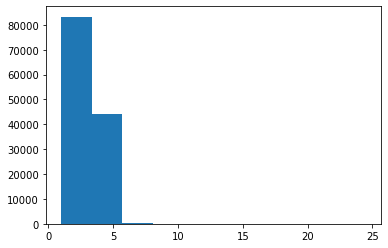

In [93]:
plt.hist(df1.ad)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ad'>

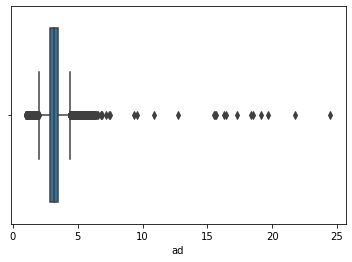

In [94]:
sns.boxplot(df1.ad)

In [95]:
np.corrcoef(df1.ad,df1.diameter)

array([[1.        , 0.43073014],
       [0.43073014, 1.        ]])

In [96]:
df1.head()

a         e          i          om           w         q  \
0     2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
616   5.215835  0.138432  22.048300   44.351815  307.949164  4.493797   
1142  5.248071  0.089745   3.137171  221.269470  236.416605  4.777081   
1833  3.025208  0.070233   9.437540  268.154776  358.646011  2.812737   
1855  2.236657  0.079589   4.741198  185.860452   55.573468  2.058643   

            ad      per_y  data_arc  condition_code  n_obs_used  diameter neo  \
0     2.979647   4.608202    8822.0             0.0        1002   939.400   N   
616   5.937873  11.912254    7787.0             0.0        3955   140.362   N   
1142  5.719062  12.022860    7896.0             0.0        2171   114.624   N   
1833  3.237679   5.261881   18160.0             0.0        2021    17.156   N   
1855  2.414671   3.345087   18207.0             0.0        2218     6.620   N   

     pha     moid  
0      N  1.59478  
616    N  3.54050  
1142   N  3.79531  
1833   N  1.79635  
1855   N  1.05062

In [97]:
df1.per_y.describe()

count    128032.000000
mean          4.748103
std           1.280078
min           0.600883
25%           4.062707
50%           4.577584
75%           5.443938
max          79.527056
Name: per_y, dtype: float64

(array([1.26364e+05, 1.65200e+03, 3.00000e+00, 0.00000e+00, 4.00000e+00,
        3.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.60088306,  8.49350033, 16.3861176 , 24.27873487, 32.17135214,
        40.06396941, 47.95658668, 55.84920395, 63.74182122, 71.63443849,
        79.52705576]),
 <BarContainer object of 10 artists>)

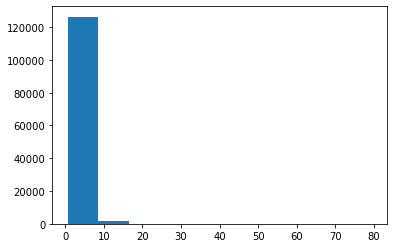

In [98]:
plt.hist(df1.per_y)

In [99]:
df1.condition_code.describe()

count    128032.000000
mean          0.509396
std           2.013810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: condition_code, dtype: float64

In [100]:
df1.condition_code.value_counts()

0.0    118891
9.0      6389
1.0      1305
2.0       373
5.0       324
7.0       194
6.0       180
4.0       156
3.0       155
8.0        65
Name: condition_code, dtype: int64

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition_code', ylabel='count'>

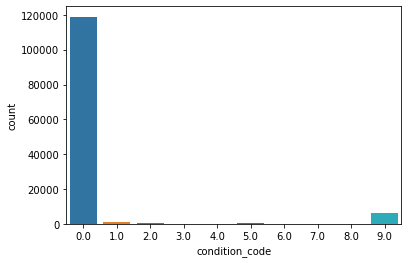

In [101]:
sns.countplot(df1.condition_code)

In [102]:
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression

In [103]:
import scipy.stats as stats

stats.f_oneway(df1['diameter'][df1['condition_code'] == 0],
                  df1['diameter'][df1['condition_code'] == 1],
                                 df1['diameter'][df1['condition_code'] == 2],
                                                df1['diameter'][df1['condition_code'] == 3],
                                                               df1['diameter'][df1['condition_code'] == 4],
                                                               df1['diameter'][df1['condition_code'] == 5],
                                                               df1['diameter'][df1['condition_code'] == 6],
                                                               df1['diameter'][df1['condition_code'] == 7],
                                                               df1['diameter'][df1['condition_code'] == 8],
                                                               df1['diameter'][df1['condition_code'] == 9])              

F_onewayResult(statistic=218.7588010598985, pvalue=0.0)

In [104]:
df1.head()

a         e          i          om           w         q  \
0     2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
616   5.215835  0.138432  22.048300   44.351815  307.949164  4.493797   
1142  5.248071  0.089745   3.137171  221.269470  236.416605  4.777081   
1833  3.025208  0.070233   9.437540  268.154776  358.646011  2.812737   
1855  2.236657  0.079589   4.741198  185.860452   55.573468  2.058643   

            ad      per_y  data_arc  condition_code  n_obs_used  diameter neo  \
0     2.979647   4.608202    8822.0             0.0        1002   939.400   N   
616   5.937873  11.912254    7787.0             0.0        3955   140.362   N   
1142  5.719062  12.022860    7896.0             0.0        2171   114.624   N   
1833  3.237679   5.261881   18160.0             0.0        2021    17.156   N   
1855  2.414671   3.345087   18207.0             0.0        2218     6.620   N   

     pha     moid  
0      N  1.59478  
616    N  3.54050  
1142   N  3.79531  
1833   N  1.79635  
1855   N  1.05062

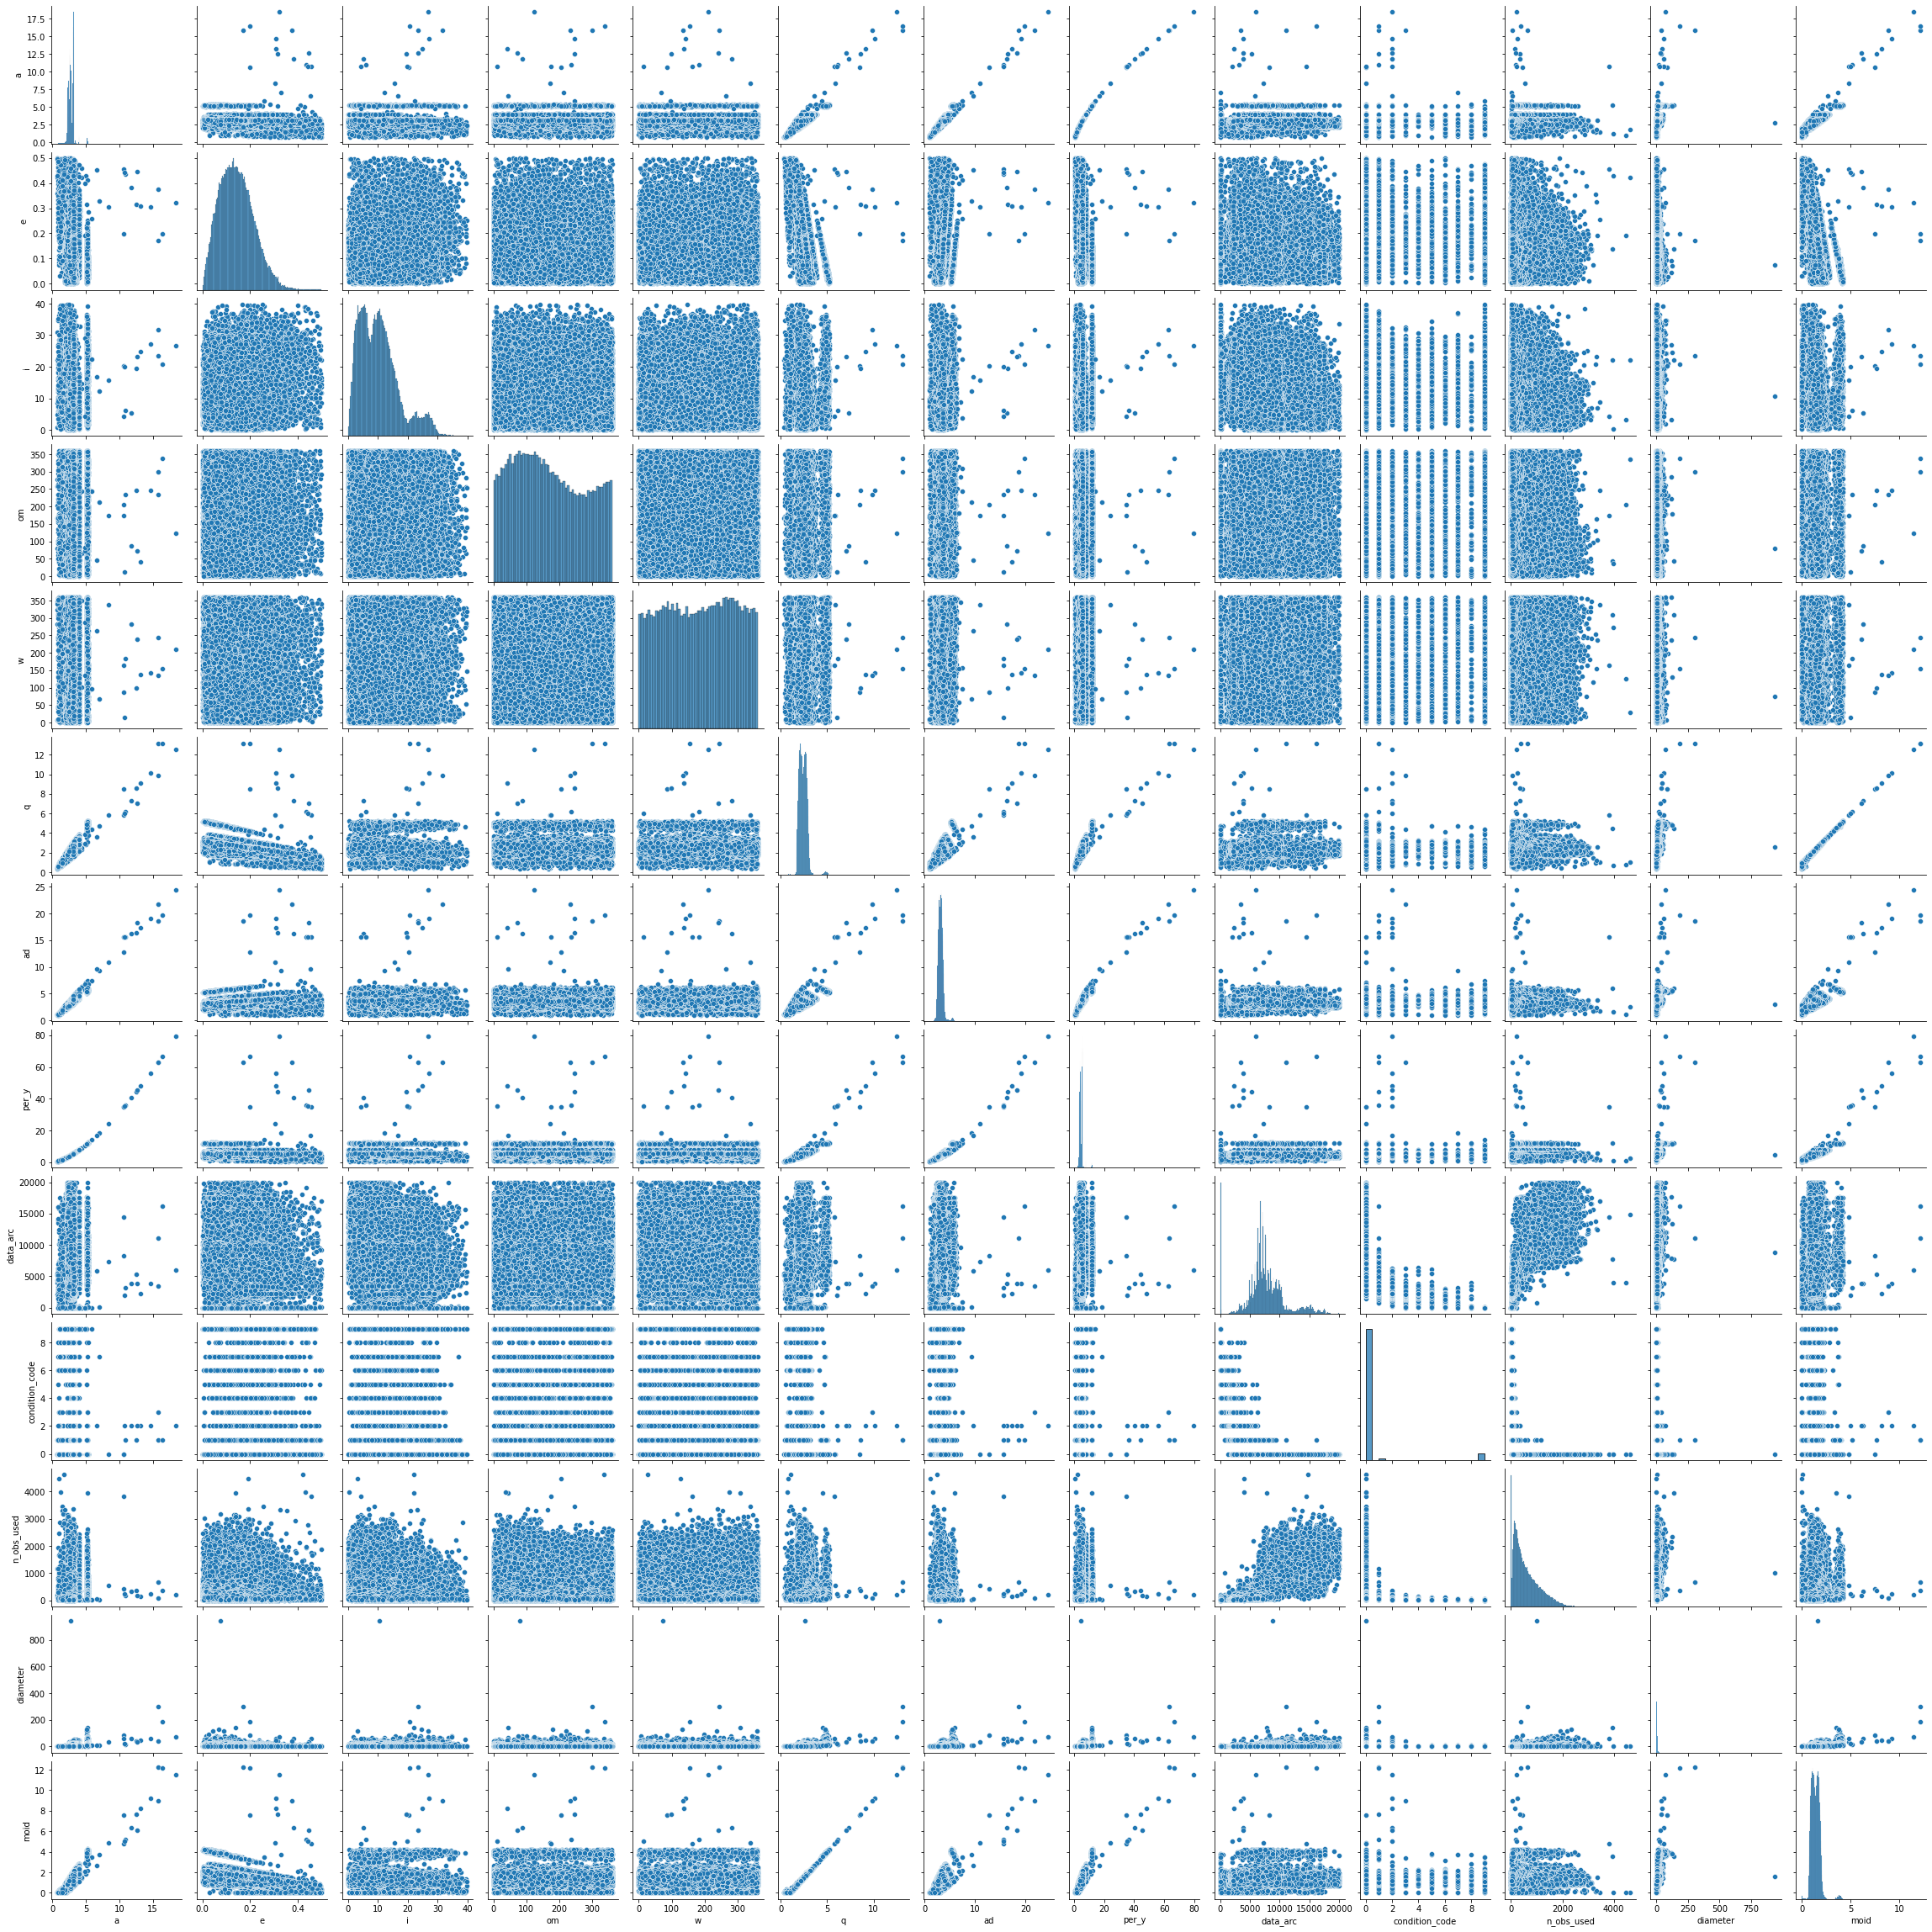

In [105]:
sns.pairplot(df1)

In [106]:
df1.neo.value_counts()

N    127643
Y       389
Name: neo, dtype: int64

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neo', ylabel='count'>

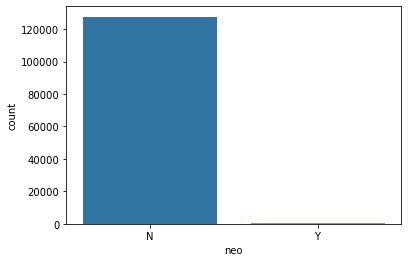

In [107]:
sns.countplot(df1.neo)

In [108]:
df1.pha.value_counts()

N    127928
Y       104
Name: pha, dtype: int64

C:\Users\saina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pha', ylabel='count'>

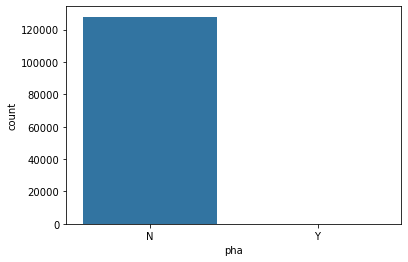

In [109]:
sns.countplot(df1.pha)

In [110]:
import scipy.stats as stats

stats.f_oneway(df1['diameter'][df1['neo'] == 'N'],df1['diameter'][df1['neo'] == 'Y'])

F_onewayResult(statistic=294.40984972981084, pvalue=6.450672767712902e-66)

In [111]:
import scipy.stats as stats

stats.f_oneway(df1['diameter'][df1['pha'] == 'N'],df1['diameter'][df1['pha'] == 'Y'])

F_onewayResult(statistic=88.5294403602697, pvalue=5.087341548538435e-21)

In [114]:
from sklearn.preprocessing import LabelEncoder


In [115]:
categorical=df1.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

2


Index(['neo', 'pha'], dtype='object')

In [116]:
for i in categorical:
    label=LabelEncoder()
    df1[i]=label.fit_transform(df1[i])


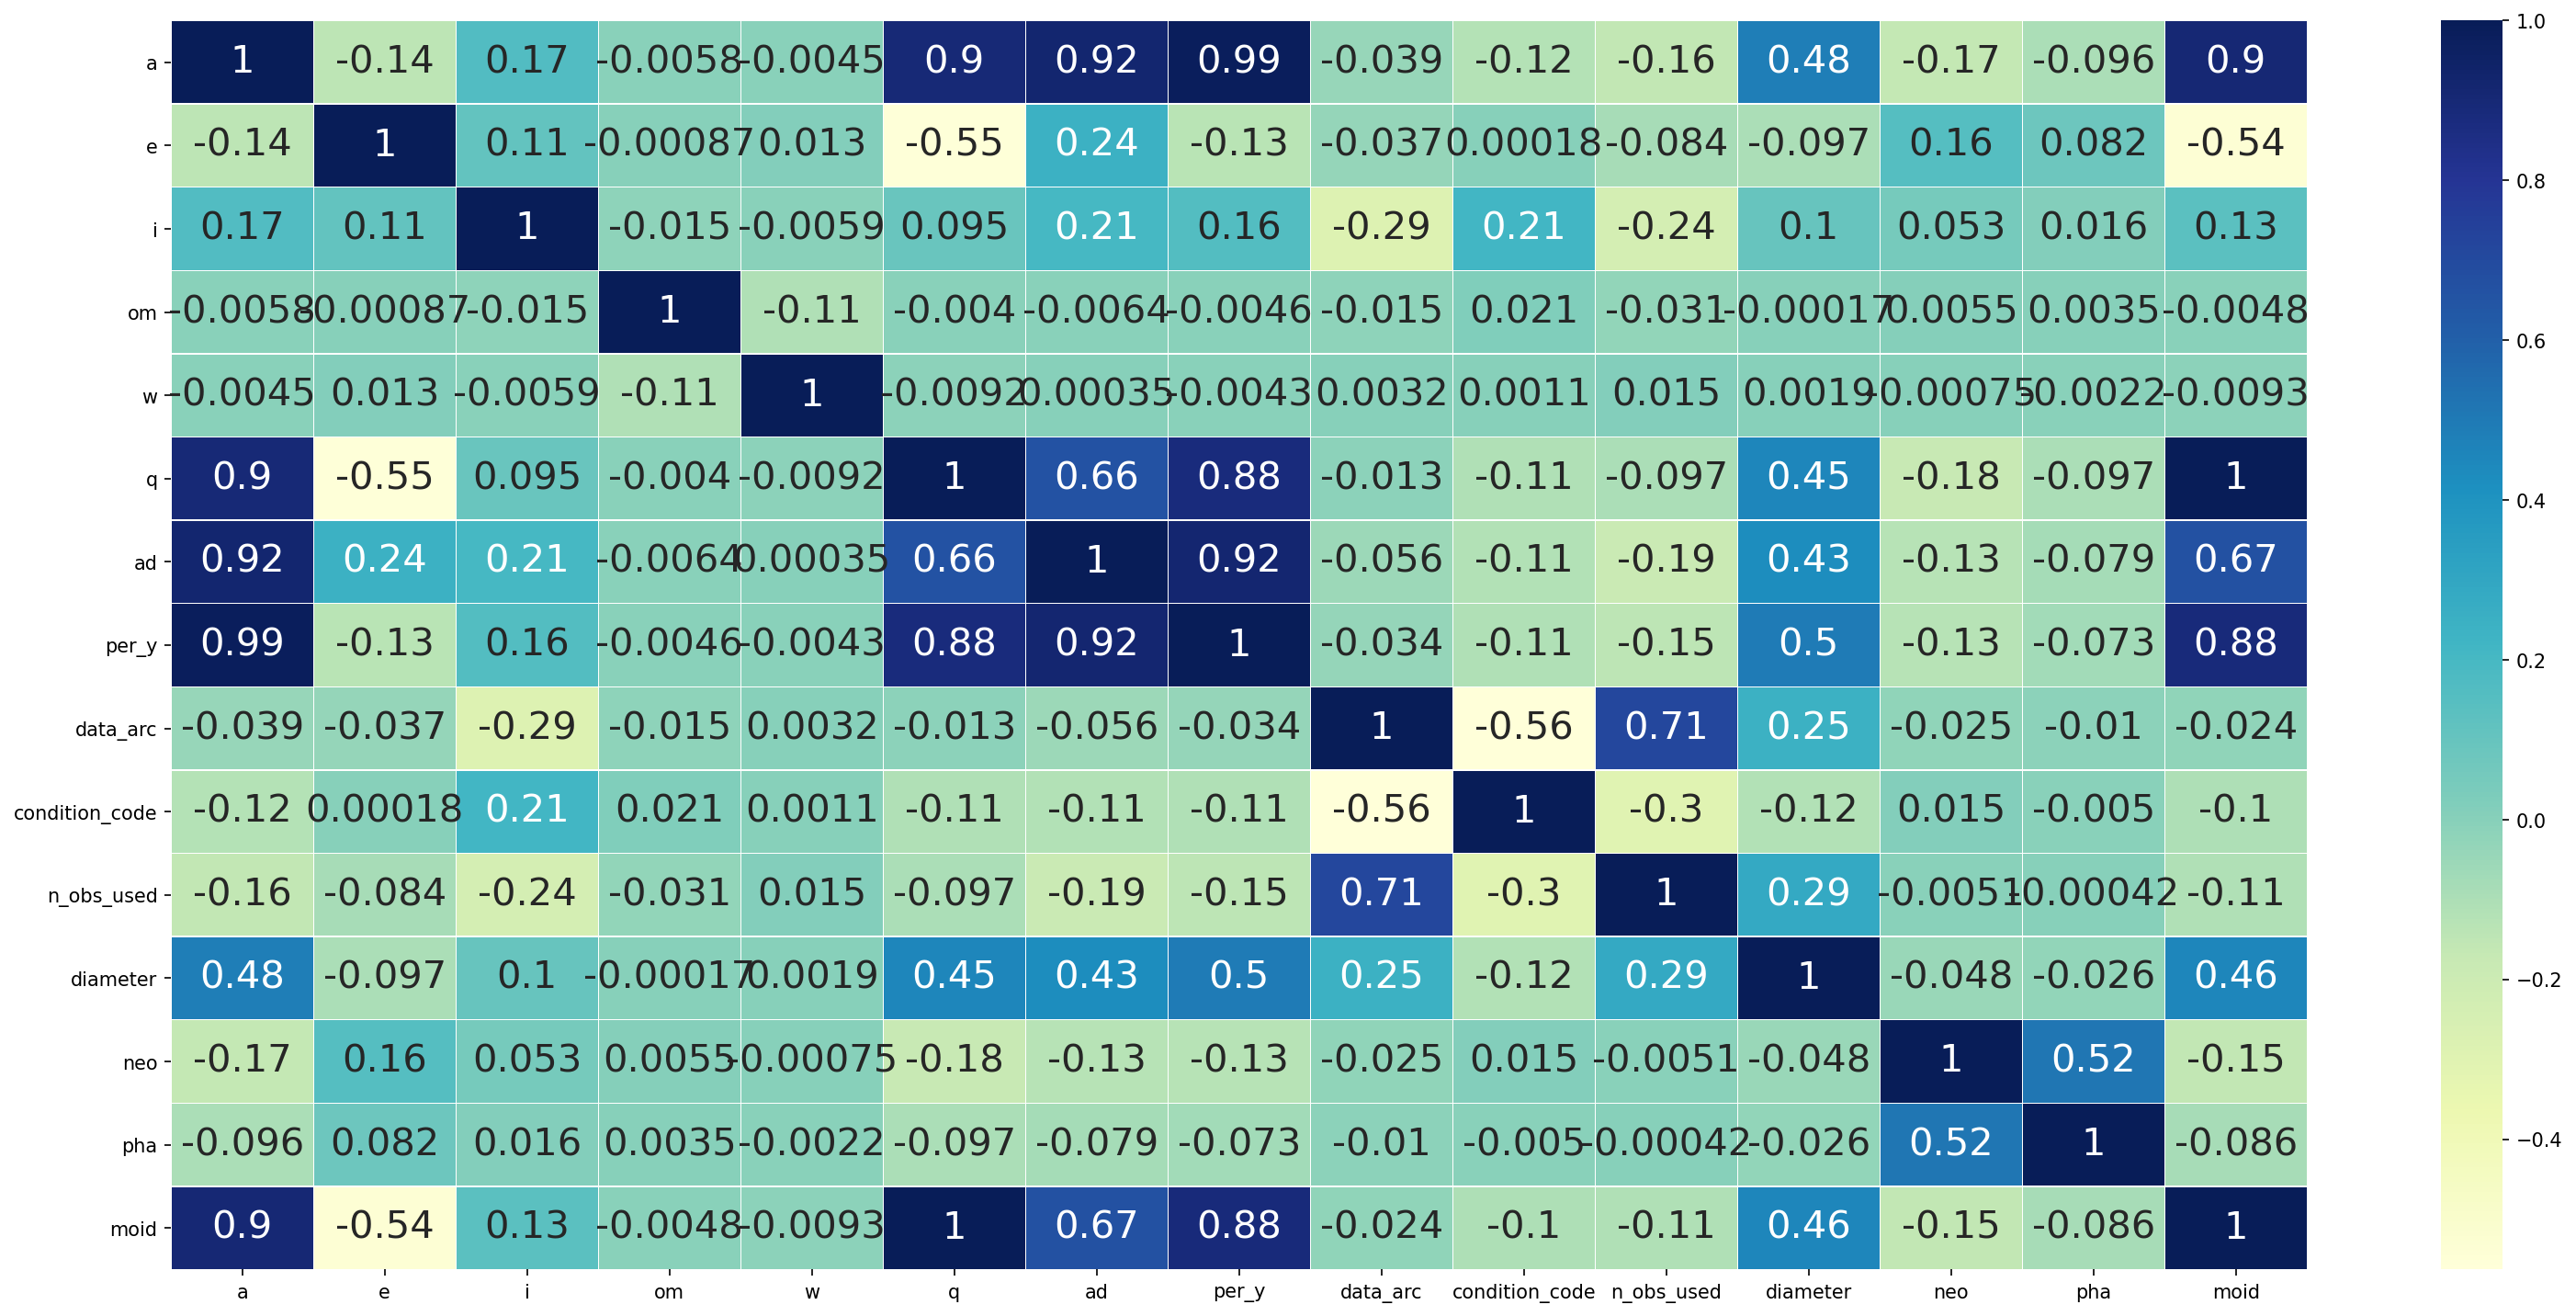

In [117]:
plt.figure(figsize=(25,12),dpi=150)
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu',lw=0.2,annot_kws={'size':20})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# MODEL BUILDING

In [118]:
# Random Forest Regressor

In [119]:
features = df1.drop('diameter', axis=1)
target = df1.diameter

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [121]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=28)

In [122]:
forest = RandomForestRegressor(max_depth=32,n_estimators=50)

In [123]:
for column in df1.columns:
    print(column, np.sum(df1[column].isna()))

a 0
e 0
i 0
om 0
w 0
q 0
ad 0
per_y 0
data_arc 0
condition_code 0
n_obs_used 0
diameter 0
neo 0
pha 0
moid 0


In [124]:
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor(max_depth=32, n_estimators=50)

In [125]:
y_pred = forest.predict(X_test)

In [126]:
r2_score(y_test,  y_pred)

0.8280217135415425

In [127]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8827215440897362
Mean Squared Error: 1.951240274278256
Root Mean Squared Error: 1.3968680232141675


In [128]:
df1.diameter.mean()

4.6231958690014485